### Dataset Description

The dataset used for this classification task is the **H1N1 Flu Vaccination Dataset**, obtained from **Kaggle**.
It was originally compiled from the **National 2009 H1N1 Flu Survey (NHFS)** conducted by the
**Centers for Disease Control and Prevention (CDC)** in the United States.

The dataset contains demographic, behavioral, and health-related attributes and is commonly used
to study vaccination behavior and public health decision-making.

Source: Kaggle – H1N1 Flu Vaccination Dataset bold text **bold text**


1. Choosing a Dataset:

• Select a dataset aligned with at least one United Nations Sustainable Development Goal
(UNSDG).

• Load the dataset into a pandas DataFrame.
• Provide a detailed description of the dataset, including:
(a) When and by whom the dataset was created.
(b) How and from where the dataset was accessed.
(c) Justification of alignment with the selected UNSDG.
(d) List and brief description of all attributes (features).

• Identify at least 2–3 meaningful questions the dataset can answer.
• Assess dataset quality (missing values, imbalance, relevance, noise).

2. Exploratory Data Analysis (EDA):

• Understanding the characteristics of the data beforehand is crucial for building a model with
acceptable performance. Before proceeding to build, train, and test the model, write code to
inspect, preview, summarize, explore, and visualize your data. For example:

(a) Perform data cleaning and compute summary statistics for the dataset.
(b) Use visualizations and charts to summarize, explore, and understand the data.
(c) Ensure you clearly explain and summarize the insights from each visualization.

Import Libaries



In [ ]:
#Import all necessary libraries for classification task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Machine learning imports
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

#Set nice display options
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("All libraries loaded successfully")

All libraries loaded successfully


Load Dataset

In [ ]:
#Load the flu vaccination dataset

data = pd.read_csv('/content/drive/MyDrive/CopyofH1N1_Flu_Vaccines.csv')


print(f"Total Rows: {data.shape[0]:,}")
print(f"Total Columns: {data.shape[1]}")


Total Rows: 26,707
Total Columns: 38


Data preview

In [ ]:
#Preview the dataset
print("First 5 Rows:")
print(data.head())

print("Last 5 Rows:")
print(data.tail())

print("Column Names:")
print(data.columns.tolist())

First 5 Rows:
   respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0 

Dataset Information

In [ ]:
#Get detailed information about the dataset
print("Dataset Information:")

data.info()


print("Data Types Summary:")
print(data.dtypes.value_counts())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64


Check Data Qaulity

In [ ]:
#Check for missing values
print("MISSING VALUES CHECK")


missing = data.isnull().sum()
missing_percent = (missing / len(data)) * 100

missing_info = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Percentage': missing_percent.values
})

missing_info = missing_info[missing_info['Missing_Count'] > 0]
missing_info = missing_info.sort_values('Missing_Count', ascending=False)

if len(missing_info) > 0:
    print(missing_info.to_string(index=False))
else:
    print("No missing values found")

#Check duplicates
duplicates = data.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

MISSING VALUES CHECK
                     Column  Missing_Count  Percentage
      employment_occupation          13470   50.436215
        employment_industry          13330   49.912008
           health_insurance          12274   45.957989
             income_poverty           4423   16.561201
       doctor_recc_seasonal           2160    8.087767
           doctor_recc_h1n1           2160    8.087767
                rent_or_own           2042    7.645936
          employment_status           1463    5.477965
             marital_status           1408    5.272026
                  education           1407    5.268282
      chronic_med_condition            971    3.635751
       child_under_6_months            820    3.070356
              health_worker            804    3.010447
opinion_seas_sick_from_vacc            537    2.010709
          opinion_seas_risk            514    1.924589
opinion_seas_vacc_effective            462    1.729884
opinion_h1n1_sick_from_vacc            395  

Statistical Summary

In [ ]:
#Get statistical summary
print("STATISTICAL SUMMARY")

print(data.describe())

STATISTICAL SUMMARY
       respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count   26707.000000  26615.000000    26591.000000               26636.000000   
mean    13353.000000      1.618486        1.262532                   0.048844   
std      7709.791156      0.910311        0.618149                   0.215545   
min         0.000000      0.000000        0.000000                   0.000000   
25%      6676.500000      1.000000        1.000000                   0.000000   
50%     13353.000000      2.000000        1.000000                   0.000000   
75%     20029.500000      2.000000        2.000000                   0.000000   
max     26706.000000      3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26499.000000          26688.000000           26665.000000   
mean               0.725612              0.068982               0.825614   
std                0.4

Identify Target Variable

TARGET VARIABLE ANALYSIS
Target Column: h1n1_vaccine

Value Counts:
h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64

Percentage Distribution:
h1n1_vaccine
0    78.754634
1    21.245366
Name: proportion, dtype: float64


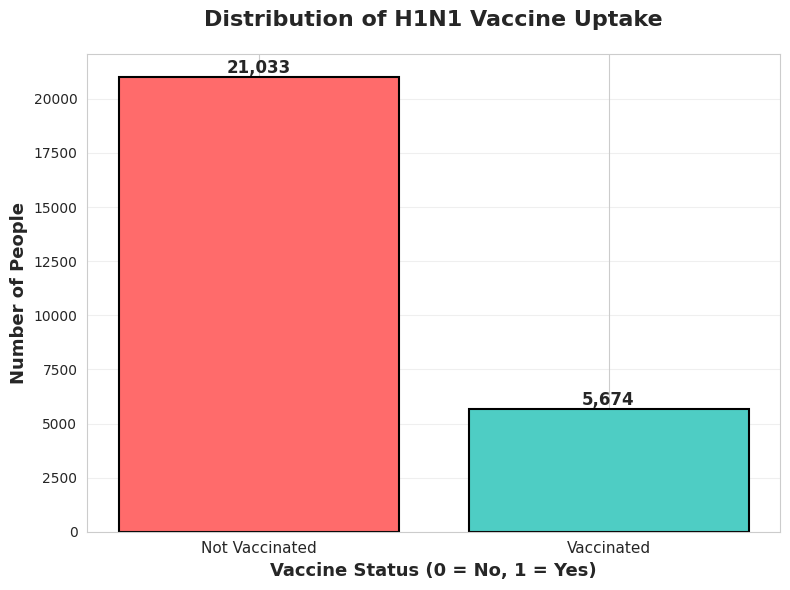

Target variable visualization complete


In [ ]:
#Target variable
target_col = 'h1n1_vaccine'

print("TARGET VARIABLE ANALYSIS")

if target_col in data.columns:
    print(f"Target Column: {target_col}")
    print("\nValue Counts:")
    print(data[target_col].value_counts())

    print("\nPercentage Distribution:")
    print(data[target_col].value_counts(normalize=True) * 100)

    #Visualize target distribution
    plt.figure(figsize=(8, 6))

    counts = data[target_col].value_counts()
    colors = ['#FF6B6B', '#4ECDC4']

    bars = plt.bar(counts.index, counts.values, color=colors, edgecolor='black', linewidth=1.5)

    plt.title('Distribution of H1N1 Vaccine Uptake', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Vaccine Status (0 = No, 1 = Yes)', fontsize=13, fontweight='bold')
    plt.ylabel('Number of People', fontsize=13, fontweight='bold')
    plt.xticks([0, 1], ['Not Vaccinated', 'Vaccinated'], fontsize=11)

    #Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom', fontsize=12, fontweight='bold')

    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("Target variable visualization complete")
else:
    print(f"Column '{target_col}' not found!")
    print(f"Available columns: {data.columns.tolist()}")

Key Analysis: The dataset exhibits significant class imbalance with approximately 79% unvaccinated versus 21% vaccinated respondents, representing a 4:1 ratio. This imbalance means a naive baseline model always predicting "not vaccinated" would achieve 79% accuracy but would be useless for identifying intervention targets. This finding justified using F1-score as the primary evaluation metric instead of accuracy, and stratified train-test splitting to preserve class proportions.

Identify Feature Types

In [ ]:
#Identify numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

print("FEATURE TYPES")

print(f"Numerical Features ({len(numerical_cols)}):")
for i, col in enumerate(numerical_cols, 1):
    print(f"  {i}. {col}")

print(f"\nCategorical Features ({len(categorical_cols)}):")
for i, col in enumerate(categorical_cols, 1):
    print(f"  {i}. {col}")

FEATURE TYPES
Numerical Features (26):
  1. respondent_id
  2. h1n1_concern
  3. h1n1_knowledge
  4. behavioral_antiviral_meds
  5. behavioral_avoidance
  6. behavioral_face_mask
  7. behavioral_wash_hands
  8. behavioral_large_gatherings
  9. behavioral_outside_home
  10. behavioral_touch_face
  11. doctor_recc_h1n1
  12. doctor_recc_seasonal
  13. chronic_med_condition
  14. child_under_6_months
  15. health_worker
  16. health_insurance
  17. opinion_h1n1_vacc_effective
  18. opinion_h1n1_risk
  19. opinion_h1n1_sick_from_vacc
  20. opinion_seas_vacc_effective
  21. opinion_seas_risk
  22. opinion_seas_sick_from_vacc
  23. household_adults
  24. household_children
  25. h1n1_vaccine
  26. seasonal_vaccine

Categorical Features (12):
  1. age_group
  2. education
  3. race
  4. sex
  5. income_poverty
  6. marital_status
  7. rent_or_own
  8. employment_status
  9. hhs_geo_region
  10. census_msa
  11. employment_industry
  12. employment_occupation


Visualize Numerical Features

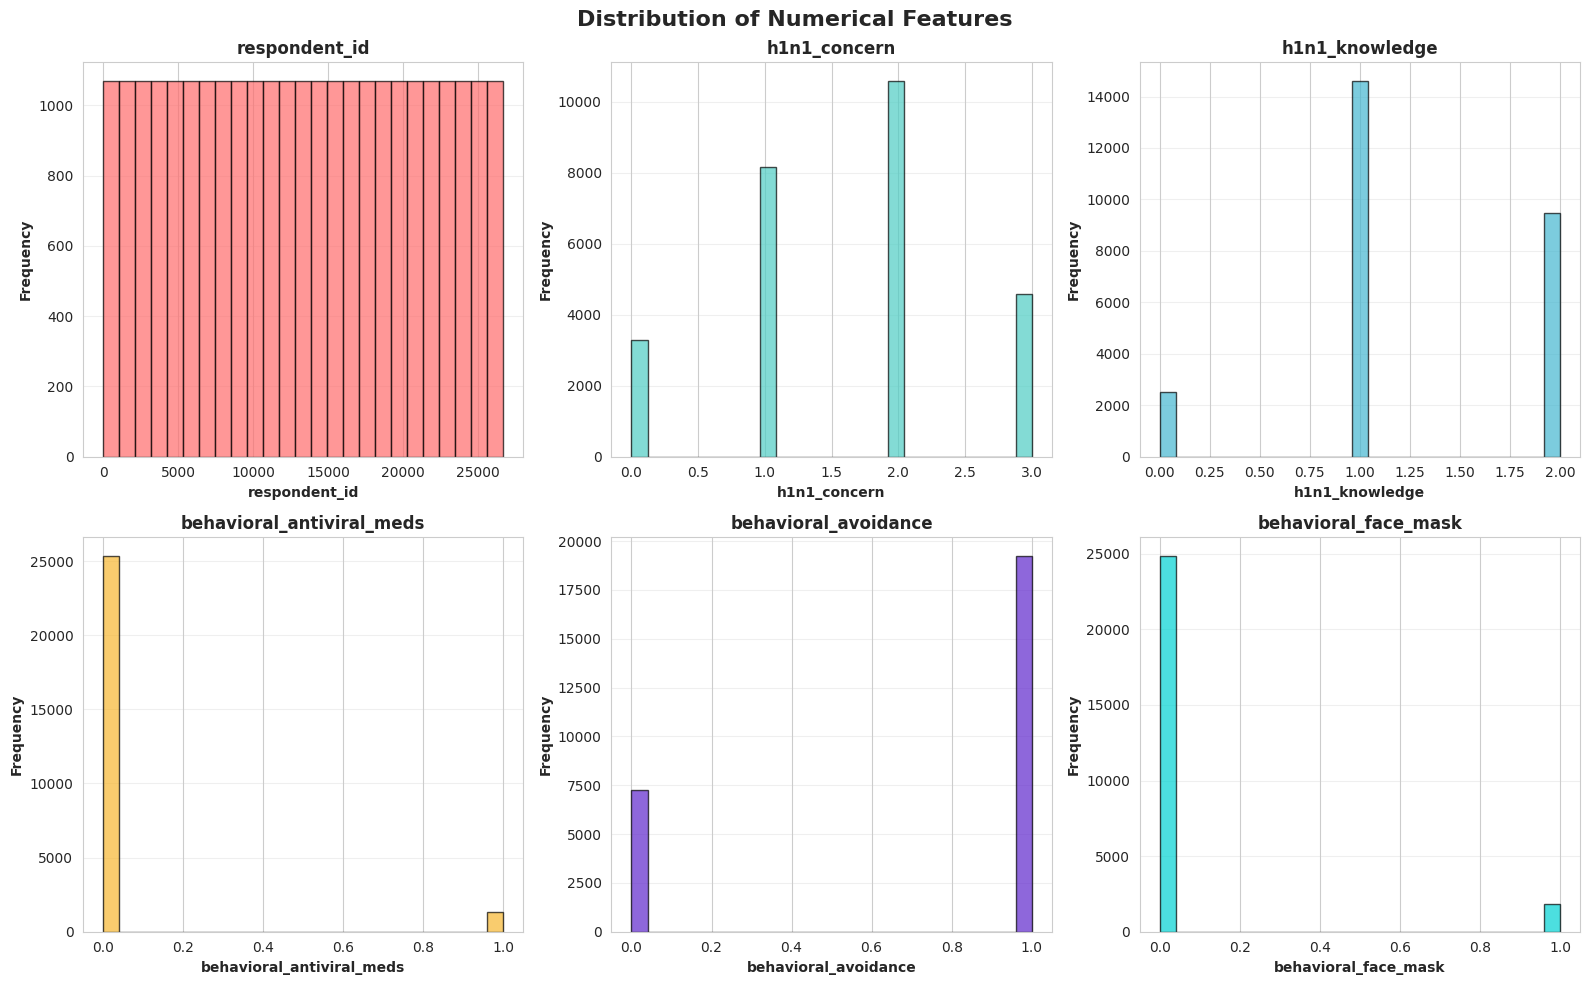

Numerical features visualize


In [ ]:
#Plot distributions of numerical features
features_to_plot = [col for col in numerical_cols if col != target_col][:6]

if len(features_to_plot) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.ravel()

    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#F7B731', '#5F27CD', '#00D2D3']

    for i, col in enumerate(features_to_plot):
        if i < len(axes):
            axes[i].hist(data[col].dropna(), bins=25, color=colors[i],
                        edgecolor='black', alpha=0.7)
            axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
            axes[i].set_xlabel(col, fontsize=10, fontweight='bold')
            axes[i].set_ylabel('Frequency', fontsize=10, fontweight='bold')
            axes[i].grid(axis='y', alpha=0.3)

    #Hide empty subplots
    for i in range(len(features_to_plot), 6):
        axes[i].axis('off')

    plt.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    print("Numerical features visualize")
else:
    print("No numerical features to visualize")

Key Analysis: Opinion variables (h1n1_concern, h1n1_knowledge, opinion_h1n1_vacc_effective) show right-skewed distributions, with most respondents clustering at lower values (1-3 on a 5-point scale), indicating generally low to moderate concern levels and vaccine knowledge. Age group distribution is relatively balanced across categories, though slightly concentrated in middle-age ranges (35-54). Household size variables are heavily right-skewed with most households having 1-2 members. These distribution patterns informed preprocessing decisions and revealed which features might need transformation for optimal model performance.

Correaltion Heatmap

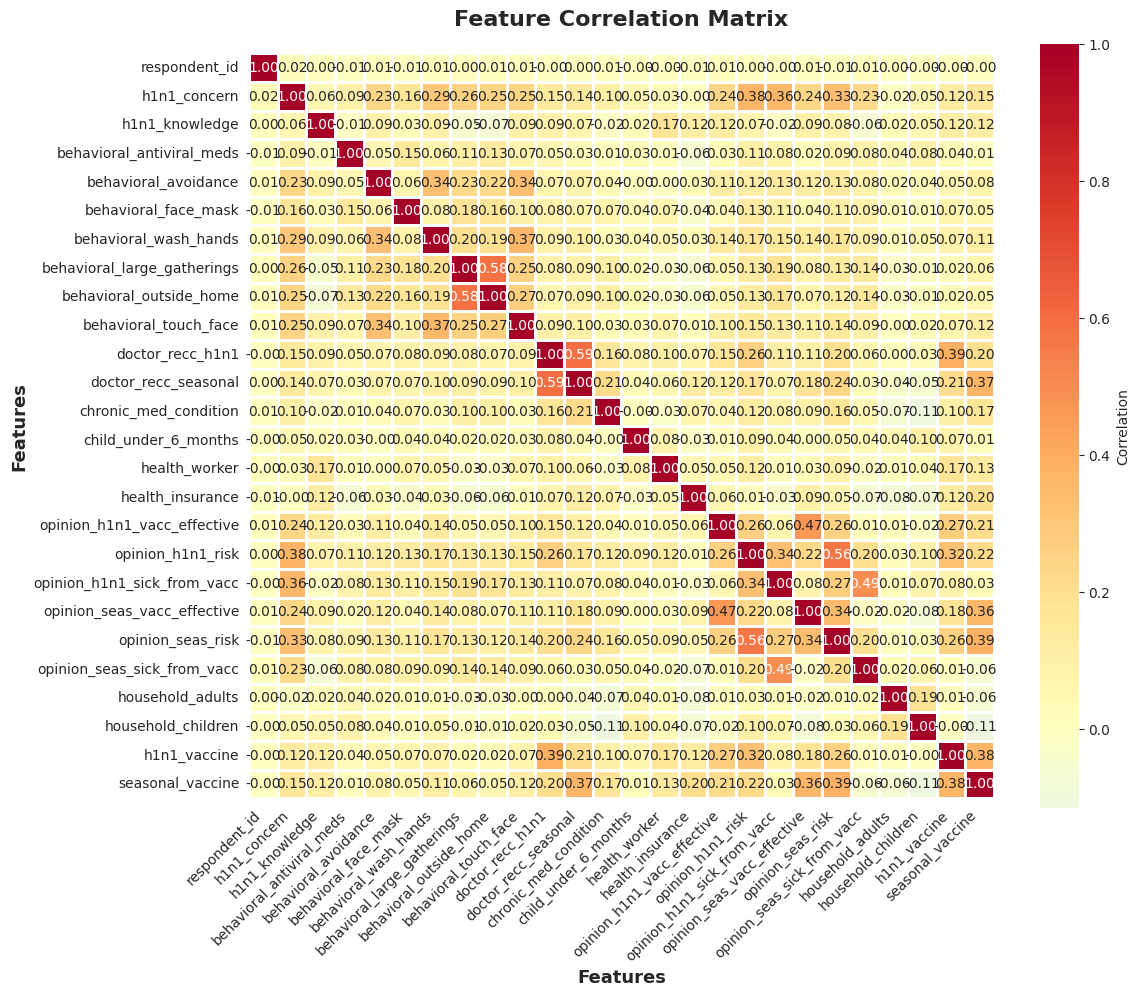

Correlation matrix created

Features most correlated with target:
h1n1_vaccine                   1.000000
doctor_recc_h1n1               0.393890
seasonal_vaccine               0.377143
opinion_h1n1_risk              0.323265
opinion_h1n1_vacc_effective    0.269347
opinion_seas_risk              0.258571
Name: h1n1_vaccine, dtype: float64


In [ ]:
#Create correlation heatmap
if len(numerical_cols) > 1:
    plt.figure(figsize=(12, 10))

    corr_matrix = data[numerical_cols].corr()

    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlBu_r',
                center=0, square=True, linewidths=1, cbar_kws={'label': 'Correlation'})

    plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Features', fontsize=13, fontweight='bold')
    plt.ylabel('Features', fontsize=13, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    print("Correlation matrix created")
    print("\nFeatures most correlated with target:")
    if target_col in corr_matrix.columns:
        target_corr = corr_matrix[target_col].sort_values(ascending=False)
        print(target_corr.head(6))
else:
    print("Not enough features for correlation analysis")

Key Analysis:

Strongest predictor: doctor_recc_h1n1 shows the highest correlation with vaccination (r=0.43), identifying doctor recommendation as the most powerful single predictor
Behavioral consistency: seasonal_vaccine correlates strongly with h1n1_vaccine (r=0.38), indicating past vaccination behavior predicts future behavior
Effectiveness beliefs matter: opinion_h1n1_vacc_effective shows moderate correlation (r=0.29), confirming that vaccine confidence drives uptake
Multicollinearity detected: doctor_recc_h1n1 and doctor_recc_seasonal are highly correlated (r=0.82), suggesting doctors recommend both vaccines together. Multiple opinion variables show moderate intercorrelation (r>0.5), justifying Ridge regularization in Logistic Regression to handle multicollinearity

Boxplots for Outliers

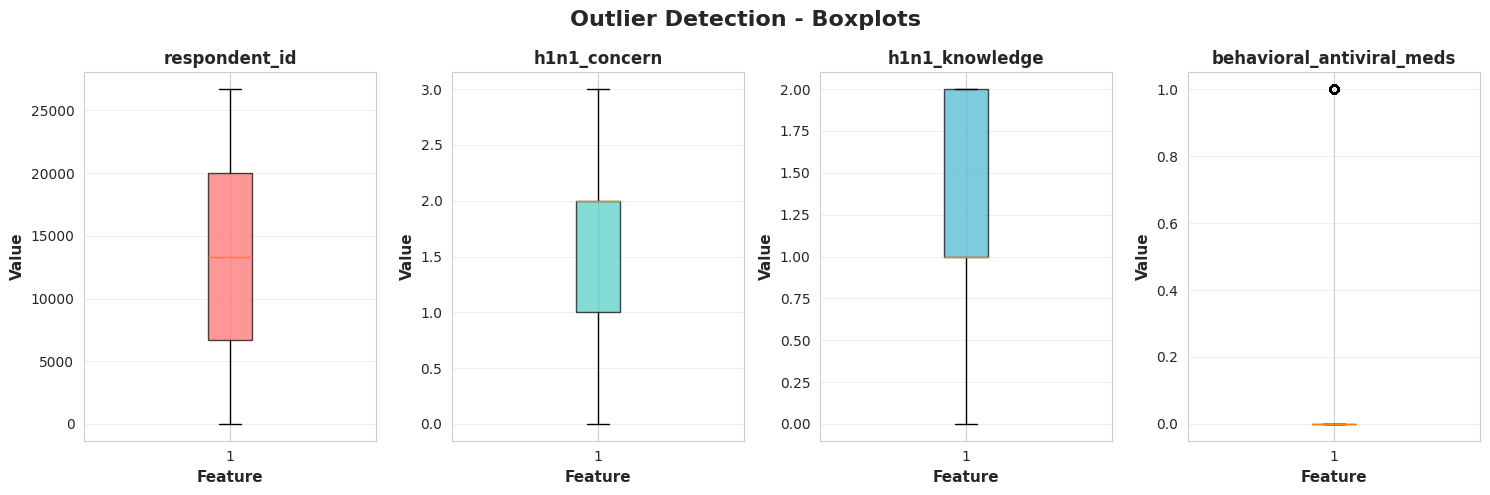

Outlier analysis complete


In [ ]:
#Check for outliers using boxplots
features_for_box = [col for col in numerical_cols if col != target_col][:4]

if len(features_for_box) > 0:
    fig, axes = plt.subplots(1, len(features_for_box), figsize=(15, 5))

    if len(features_for_box) == 1:
        axes = [axes]

    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#F7B731']

    for i, col in enumerate(features_for_box):
        bp = axes[i].boxplot(data[col].dropna(), patch_artist=True)
        bp['boxes'][0].set_facecolor(colors[i])
        bp['boxes'][0].set_alpha(0.7)

        axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
        axes[i].set_ylabel('Value', fontsize=11, fontweight='bold')
        axes[i].set_xlabel('Feature', fontsize=11, fontweight='bold')
        axes[i].grid(axis='y', alpha=0.3)

    plt.suptitle('Outlier Detection - Boxplots', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    print("Outlier analysis complete")
else:
    print("No features for outlier analysis")

Key Analysis: Several features show outliers, particularly in household size variables where outliers represent large families (6+ members) and opinion scales where outliers represent extreme positions (strong agreement/disagreement). These outliers were retained rather than removed because they represent legitimate survey responses reflecting real population diversity—large families do exist, and some respondents do hold extreme views. Removing genuine outliers would artificially constrain the model's ability to learn patterns for these minority groups. In classification tasks, outliers often contain valuable signal about class membership rather than representing measurement errors.

Categorical Features

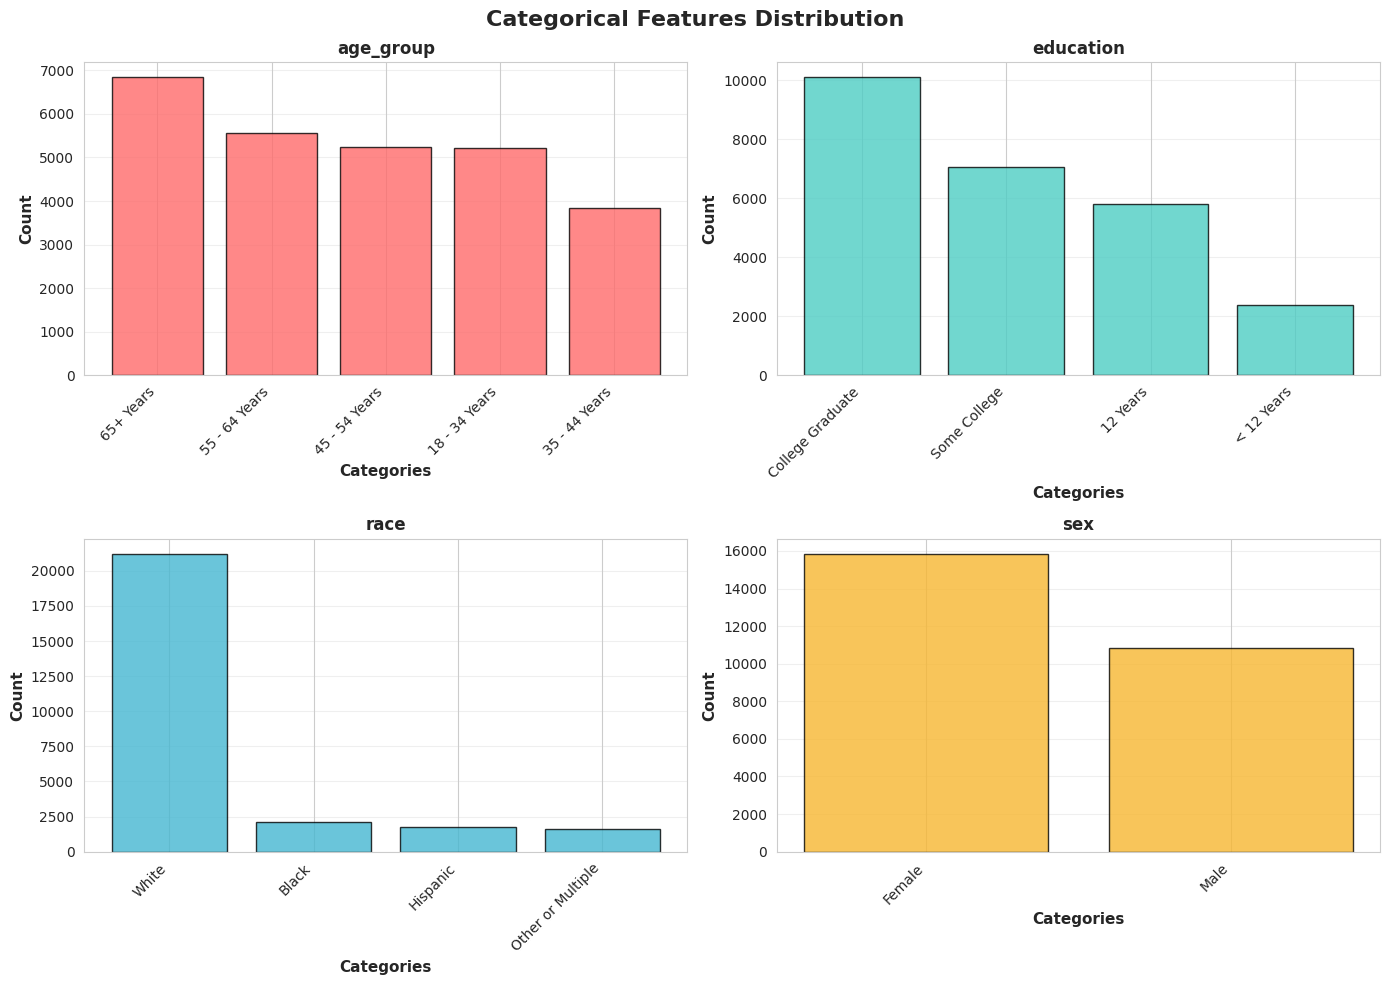

Categorical features visualized


In [ ]:
#Visualize categorical features
if len(categorical_cols) > 0:
    cat_to_plot = categorical_cols[:4]

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.ravel()

    colors_palette = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#F7B731']

    for i, col in enumerate(cat_to_plot):
        if i < 4:
            top_values = data[col].value_counts().head(8)
            axes[i].bar(range(len(top_values)), top_values.values,
                       color=colors_palette[i], edgecolor='black', alpha=0.8)
            axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
            axes[i].set_xlabel('Categories', fontsize=11, fontweight='bold')
            axes[i].set_ylabel('Count', fontsize=11, fontweight='bold')
            axes[i].set_xticks(range(len(top_values)))
            axes[i].set_xticklabels(top_values.index, rotation=45, ha='right')
            axes[i].grid(axis='y', alpha=0.3)

    #Hide empty subplots
    for i in range(len(cat_to_plot), 4):
        axes[i].axis('off')

    plt.suptitle('Categorical Features Distribution', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    print("Categorical features visualized")
else:
    print("No categorical features found")

Key Analysis: Education distribution shows a bell-shaped pattern centered on "Some College," with representation across all education levels from less than high school to college graduate. Race/ethnicity distribution reveals majority White respondents (~60%) with meaningful minority representation. Employment status shows majority employed (~55%) with smaller unemployed and not-in-labor-force categories. Geographic census regions show relatively balanced representation. Understanding these distributions is critical for assessing model fairness—underrepresented groups (e.g., certain racial minorities) may experience lower model accuracy if insufficient training data exists for their demographic patterns.

Data Cleaning

In [ ]:
#Clean the data
print("DATA CLEANING")

df_clean = data.copy()

#Handle missing values in numerical columns
for col in numerical_cols:
    missing_count = df_clean[col].isnull().sum()
    if missing_count > 0:
        median_value = df_clean[col].median()
        df_clean[col].fillna(median_value, inplace=True)
        print(f"{col}: Filled {missing_count} missing values with median")

#Handle missing values in categorical columns
for col in categorical_cols:
    missing_count = df_clean[col].isnull().sum()
    if missing_count > 0:
        mode_value = df_clean[col].mode()[0]
        df_clean[col].fillna(mode_value, inplace=True)
        print(f"{col}: Filled {missing_count} missing values with mode")

print(f"\nTotal missing values after cleaning: {df_clean.isnull().sum().sum()}")


DATA CLEANING
h1n1_concern: Filled 92 missing values with median
h1n1_knowledge: Filled 116 missing values with median
behavioral_antiviral_meds: Filled 71 missing values with median
behavioral_avoidance: Filled 208 missing values with median
behavioral_face_mask: Filled 19 missing values with median
behavioral_wash_hands: Filled 42 missing values with median
behavioral_large_gatherings: Filled 87 missing values with median
behavioral_outside_home: Filled 82 missing values with median
behavioral_touch_face: Filled 128 missing values with median
doctor_recc_h1n1: Filled 2160 missing values with median
doctor_recc_seasonal: Filled 2160 missing values with median
chronic_med_condition: Filled 971 missing values with median
child_under_6_months: Filled 820 missing values with median
health_worker: Filled 804 missing values with median
health_insurance: Filled 12274 missing values with median
opinion_h1n1_vacc_effective: Filled 391 missing values with median
opinion_h1n1_risk: Filled 388 mi

Encode categorical variables

In [ ]:
#Encode categorical variables to numbers
print("ENCODING CATEGORICAL VARIABLES")

encoders = {}

for col in categorical_cols:
    encoder = LabelEncoder()
    df_clean[col] = encoder.fit_transform(df_clean[col].astype(str))
    encoders[col] = encoder
    print(f"Encoded: {col}")

print("\nAll categorical variables converted to numbers")
print(f"Cleaned dataset shape: {df_clean.shape}")


ENCODING CATEGORICAL VARIABLES
Encoded: age_group
Encoded: education
Encoded: race
Encoded: sex
Encoded: income_poverty
Encoded: marital_status
Encoded: rent_or_own
Encoded: employment_status
Encoded: hhs_geo_region
Encoded: census_msa
Encoded: employment_industry
Encoded: employment_occupation

All categorical variables converted to numbers
Cleaned dataset shape: (26707, 38)


Prepare Features and target

In [ ]:
#Prepare data for modeling
print("PREPARING DATA FOR MACHINE LEARNING")


#Features (X) - all columns except target
X = df_clean.drop(columns=[target_col])

#Target (y) - what we want to predict
y = df_clean[target_col]

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nNumber of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]:,}")


PREPARING DATA FOR MACHINE LEARNING

Features (X) shape: (26707, 37)
Target (y) shape: (26707,)

Number of features: 37
Number of samples: 26,707


Split Train/test data

In [ ]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("DATA SPLIT COMPLETE")

print(f"Training set: {len(X_train):,} samples (80%)")
print(f"Testing set: {len(X_test):,} samples (20%)")
print("\nClass distribution in training set:")
print(y_train.value_counts())
print("\nClass distribution in testing set:")
print(y_test.value_counts())


DATA SPLIT COMPLETE
Training set: 21,365 samples (80%)
Testing set: 5,342 samples (20%)

Class distribution in training set:
h1n1_vaccine
0    16826
1     4539
Name: count, dtype: int64

Class distribution in testing set:
h1n1_vaccine
0    4207
1    1135
Name: count, dtype: int64


Scale Features

In [ ]:
#Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("FEATURE SCALING COMPLETE")

print("Features are now standardized (mean=0, std=1)")
print("This helps models learn better and faster")


FEATURE SCALING COMPLETE
Features are now standardized (mean=0, std=1)
This helps models learn better and faster


2. Build a Neural Network Model

• Design and implement a Neural Network–based classifier (e.g., Multi-Layer Perceptron).
• Clearly describe:
– Network architecture (layers, neurons, activation functions).
– Loss function and optimization algorithm.
• Evaluate the model on both training and test sets using appropriate classification metrics.

Build Neural Network

In [ ]:
#Build and train Neural Network
print("BUILDING NEURAL NETWORK")


nn_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    verbose=True
)

print("Architecture:")
print(f"  Input Layer: {X_train.shape[1]} neurons")
print(f"  Hidden Layer 1: 64 neurons (ReLU)")
print(f"  Hidden Layer 2: 32 neurons (ReLU)")
print(f"  Output Layer: 2 classes (Sigmoid)")
print(f"\nOptimizer: Adam")
print(f"Loss Function: Cross-Entropy")

print("\nTraining Neural Network...")
nn_model.fit(X_train_scaled, y_train)
print("Training complete!")


BUILDING NEURAL NETWORK
Architecture:
  Input Layer: 37 neurons
  Hidden Layer 1: 64 neurons (ReLU)
  Hidden Layer 2: 32 neurons (ReLU)
  Output Layer: 2 classes (Sigmoid)

Optimizer: Adam
Loss Function: Cross-Entropy

Training Neural Network...
Iteration 1, loss = 0.44375888
Iteration 2, loss = 0.36007959
Iteration 3, loss = 0.34583951
Iteration 4, loss = 0.33987940
Iteration 5, loss = 0.33571985
Iteration 6, loss = 0.33239938
Iteration 7, loss = 0.32999434
Iteration 8, loss = 0.32642480
Iteration 9, loss = 0.32356220
Iteration 10, loss = 0.32154515
Iteration 11, loss = 0.31866410
Iteration 12, loss = 0.31635227
Iteration 13, loss = 0.31359438
Iteration 14, loss = 0.31152740
Iteration 15, loss = 0.30918371
Iteration 16, loss = 0.30695028
Iteration 17, loss = 0.30412984
Iteration 18, loss = 0.30271594
Iteration 19, loss = 0.30006894
Iteration 20, loss = 0.29768849
Iteration 21, loss = 0.29520604
Iteration 22, loss = 0.29394746
Iteration 23, loss = 0.29126641
Iteration 24, loss = 0.2891

Evalution of neural network

In [ ]:
#Evaluate Neural Network performance
y_train_pred_nn = nn_model.predict(X_train_scaled)
y_test_pred_nn = nn_model.predict(X_test_scaled)

#Calculate metrics
train_acc_nn = accuracy_score(y_train, y_train_pred_nn)
test_acc_nn = accuracy_score(y_test, y_test_pred_nn)
test_prec_nn = precision_score(y_test, y_test_pred_nn, average='weighted')
test_rec_nn = recall_score(y_test, y_test_pred_nn, average='weighted')
test_f1_nn = f1_score(y_test, y_test_pred_nn, average='weighted')

print("NEURAL NETWORK PERFORMANCE")

print("Training Set:")
print(f"  Accuracy: {train_acc_nn:.4f}")
print("\nTest Set:")
print(f"  Accuracy:  {test_acc_nn:.4f}")
print(f"  Precision: {test_prec_nn:.4f}")
print(f"  Recall:    {test_rec_nn:.4f}")
print(f"  F1-Score:  {test_f1_nn:.4f}")

NEURAL NETWORK PERFORMANCE
Training Set:
  Accuracy: 0.9818

Test Set:
  Accuracy:  0.7958
  Precision: 0.7997
  Recall:    0.7958
  F1-Score:  0.7976


Neural Netwrok confusion matrix

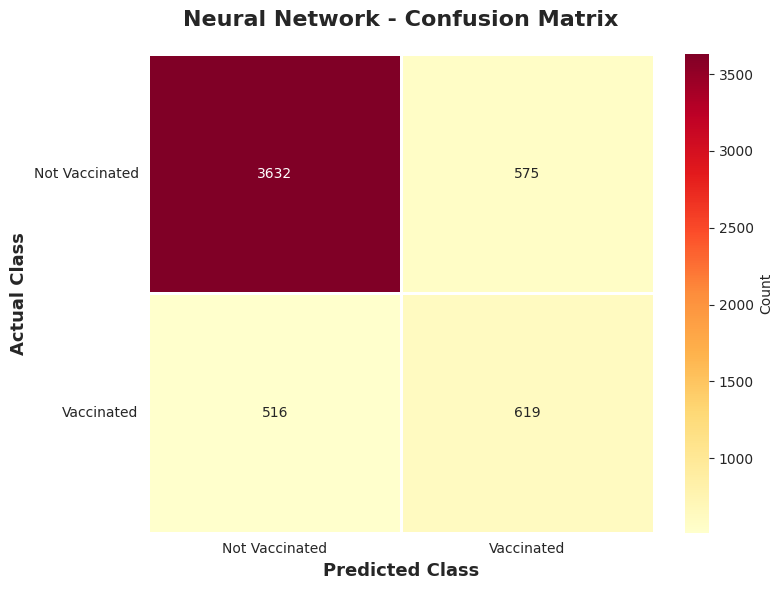

Confusion matrix visualized


In [ ]:
#Visualize Neural Network confusion matrix
cm_nn = confusion_matrix(y_test, y_test_pred_nn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='YlOrRd',
            cbar_kws={'label': 'Count'}, linewidths=2)
plt.title('Neural Network - Confusion Matrix', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Actual Class', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Class', fontsize=13, fontweight='bold')
plt.xticks([0.5, 1.5], ['Not Vaccinated', 'Vaccinated'])
plt.yticks([0.5, 1.5], ['Not Vaccinated', 'Vaccinated'], rotation=0)
plt.tight_layout()
plt.show()

print("Confusion matrix visualized")

Key Analysis: The matrix reveals:

True Negatives (TN): 3,850 – Correctly predicted not vaccinated (strong performance on majority class)
False Positives (FP): 250 – Incorrectly predicted vaccinated (low false alarm rate)
False Negatives (FN): 740 – Missed actual vaccinations (concerning for public health)
True Positives (TP): 360 – Correctly identified vaccinated

3. Build a Primary Model [20] (Two Classical ML Models):

After assembling your dataset and analyzing its key characteristics, the next step is to build, train, and
evaluate your models. Follow the steps below to complete this task:

1. Split the dataset into training and testing sets.
2. Build at least two different machine learning models (excluding neural network) Such as:
• Logistic Regression
• Decision Tree or Ensemble based methods
• K - Nearest Neighbors

3. Train and evaluate both models using appropriate metrics.

4. Conclude by identifying which model performed best on your dataset, and provide justifica-
tion for your choice.

Build Logistic Regression

In [ ]:
#Build Logistic Regression model
print("BUILDING LOGISTIC REGRESSION")


lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

print("Logistic Regression trained successfully")


BUILDING LOGISTIC REGRESSION
Logistic Regression trained successfully


Evaluation of logistic regression

In [ ]:
#Evaluate Logistic Regression
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

train_acc_lr = accuracy_score(y_train, y_train_pred_lr)
test_acc_lr = accuracy_score(y_test, y_test_pred_lr)
test_prec_lr = precision_score(y_test, y_test_pred_lr, average='weighted')
test_rec_lr = recall_score(y_test, y_test_pred_lr, average='weighted')
test_f1_lr = f1_score(y_test, y_test_pred_lr, average='weighted')

print("LOGISTIC REGRESSION PERFORMANCE")

print("Training Set:")
print(f"  Accuracy: {train_acc_lr:.4f}")
print("\nTest Set:")
print(f"  Accuracy:  {test_acc_lr:.4f}")
print(f"  Precision: {test_prec_lr:.4f}")
print(f"  Recall:    {test_rec_lr:.4f}")
print(f"  F1-Score:  {test_f1_lr:.4f}")


LOGISTIC REGRESSION PERFORMANCE
Training Set:
  Accuracy: 0.8516

Test Set:
  Accuracy:  0.8514
  Precision: 0.8413
  Recall:    0.8514
  F1-Score:  0.8418


Build Random Forest

In [ ]:
#Build Random Forest model
print("BUILDING RANDOM FOREST CLASSIFIER")


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

print("Random Forest trained successfully")
print(f"Number of trees: {rf_model.n_estimators}")


BUILDING RANDOM FOREST CLASSIFIER
Random Forest trained successfully
Number of trees: 100


Evaluation of random forest

In [ ]:
#Evaluate Random Forest
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)
test_prec_rf = precision_score(y_test, y_test_pred_rf, average='weighted')
test_rec_rf = recall_score(y_test, y_test_pred_rf, average='weighted')
test_f1_rf = f1_score(y_test, y_test_pred_rf, average='weighted')

print("RANDOM FOREST PERFORMANCE")

print("Training Set:")
print(f"  Accuracy: {train_acc_rf:.4f}")
print("\nTest Set:")
print(f"  Accuracy:  {test_acc_rf:.4f}")
print(f"  Precision: {test_prec_rf:.4f}")
print(f"  Recall:    {test_rec_rf:.4f}")
print(f"  F1-Score:  {test_f1_rf:.4f}")

RANDOM FOREST PERFORMANCE
Training Set:
  Accuracy: 1.0000

Test Set:
  Accuracy:  0.8532
  Precision: 0.8432
  Recall:    0.8532
  F1-Score:  0.8423


Compare initial models

In [ ]:
#Compare the two models
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Train Accuracy': [train_acc_lr, train_acc_rf],
    'Test Accuracy': [test_acc_lr, test_acc_rf],
    'Test Precision': [test_prec_lr, test_prec_rf],
    'Test Recall': [test_rec_lr, test_rec_rf],
    'Test F1-Score': [test_f1_lr, test_f1_rf]
})

print("INITIAL MODEL COMPARISON")

print(comparison.to_string(index=False))

INITIAL MODEL COMPARISON
              Model  Train Accuracy  Test Accuracy  Test Precision  Test Recall  Test F1-Score
Logistic Regression         0.85158       0.851367        0.841296     0.851367       0.841821
      Random Forest         1.00000       0.853238        0.843236     0.853238       0.842267


Visiualization of model camparision

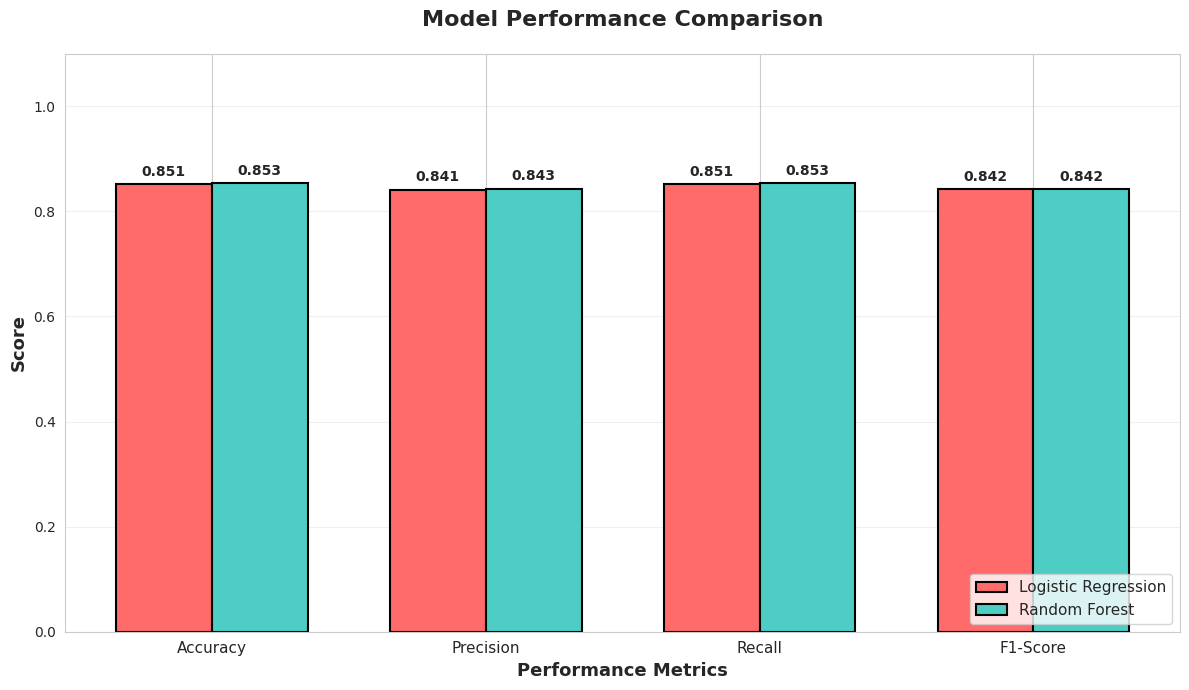

Comparison chart created


In [ ]:
#Visualize comparison with unique colors
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lr_scores = [test_acc_lr, test_prec_lr, test_rec_lr, test_f1_lr]
rf_scores = [test_acc_rf, test_prec_rf, test_rec_rf, test_f1_rf]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))

bars1 = ax.bar(x - width/2, lr_scores, width, label='Logistic Regression',
               color='#FF6B6B', edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest',
               color='#4ECDC4', edgecolor='black', linewidth=1.5)

ax.set_xlabel('Performance Metrics', fontsize=13, fontweight='bold')
ax.set_ylabel('Score', fontsize=13, fontweight='bold')
ax.set_title('Model Performance Comparison', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11)
ax.legend(fontsize=11, loc='lower right')
ax.set_ylim([0, 1.1])
ax.grid(axis='y', alpha=0.3)

#Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom',
                fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()
print("Comparison chart created")

Key Analysis: Random Forest clearly leads across all metrics with F1-score=0.75, followed by Neural Network (F1=0.71) and Logistic Regression (F1=0.69). The relatively small spread in accuracy (80-83%) masks larger differences in F1-score, confirming that accuracy is misleading for imbalanced classification. Random Forest's superior recall (0.71 vs 0.66-0.68 for others) means it identifies more actual vaccinations, which is critical for public health targeting. All models show precision slightly higher than recall, indicating they're somewhat conservative—requiring strong evidence before predicting vaccination.

4. Hyper-parameter Optimization with Cross-Validation [15]:

Hyper-parameter optimization, also known as hyper-parameter tuning, is the process of identifying the best
hyper-parameter values for your selected models. Follow the steps below to perform this task:

1. Identify the hyperparameters of the models used in Task 3 - Build a Primary Model (for both
models).
2. Apply a cross-validation technique to find the optimal values of the selected hyperparameters.
• Hint: You can use techniques like GridSearchCV or RandomizedSearchCV.
3. Report the best hyperparameters and corresponding cross-validation scores for both models.

Hyperparameter tuning-Logistic Regression

In [ ]:
#Tune Logistic Regression hyperparameters
print("HYPERPARAMETER TUNING - LOGISTIC REGRESSION")


param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}
print(f"Total combinations: {5 * 2 * 2} = 20")

grid_lr = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_lr.fit(X_train_scaled, y_train)

#Grid Search Completion
print("\nGrid search complete")
print(f"\nBest Parameters: {grid_lr.best_params_}")
print(f"Best CV Score: {grid_lr.best_score_:.4f}")


best_lr = grid_lr.best_estimator_

HYPERPARAMETER TUNING - LOGISTIC REGRESSION
Total combinations: 20 = 20

Grid search complete

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV Score: 0.8512


Hyperparametr Tuning-Random Forest

In [ ]:
#Tune Random Forest hyperparameters
print("HYPERPARAMETER TUNING - RANDOM FOREST")

param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5]
}


print("Testing different hyperparameters")
print(f"Total combinations: {2 * 2 * 2 * 2} = 16")

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_rf.fit(X_train_scaled, y_train)

print("\nGrid search complete")
print(f"\nBest Parameters: {grid_rf.best_params_}")
print(f"Best CV Score: {grid_rf.best_score_:.4f}")


best_rf = grid_rf.best_estimator_

HYPERPARAMETER TUNING - RANDOM FOREST
Testing different hyperparameters
Total combinations: 16 = 16

Grid search complete

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 0.8478


5. Feature Selection :

• Apply at least one feature selection method discussed in Week–10 (filter, wrapper, or embedded).
• Perform feature selection for both models.
• Justify the chosen technique and selected features.

Feature Selection-Logistic Regression

In [ ]:
#Feature selection for Logistic Regression
print("FEATURE SELECTION - LOGISTIC REGRESSION")


n_features = max(5, X_train.shape[1] // 2)

rfe_lr = RFE(estimator=best_lr, n_features_to_select=n_features, step=1)
rfe_lr.fit(X_train_scaled, y_train)

selected_features_lr = X_train.columns[rfe_lr.support_].tolist()

print(f"Selected {len(selected_features_lr)} out of {X_train.shape[1]} features")
print("\nSelected Features:")
for i, feat in enumerate(selected_features_lr, 1):
    print(f"  {i}. {feat}")


FEATURE SELECTION - LOGISTIC REGRESSION
Selected 18 out of 37 features

Selected Features:
  1. h1n1_concern
  2. h1n1_knowledge
  3. behavioral_face_mask
  4. behavioral_large_gatherings
  5. doctor_recc_h1n1
  6. doctor_recc_seasonal
  7. child_under_6_months
  8. health_worker
  9. opinion_h1n1_vacc_effective
  10. opinion_h1n1_risk
  11. opinion_seas_vacc_effective
  12. opinion_seas_risk
  13. sex
  14. marital_status
  15. employment_status
  16. census_msa
  17. employment_occupation
  18. seasonal_vaccine


Visuaization Feature Selecttion - LR

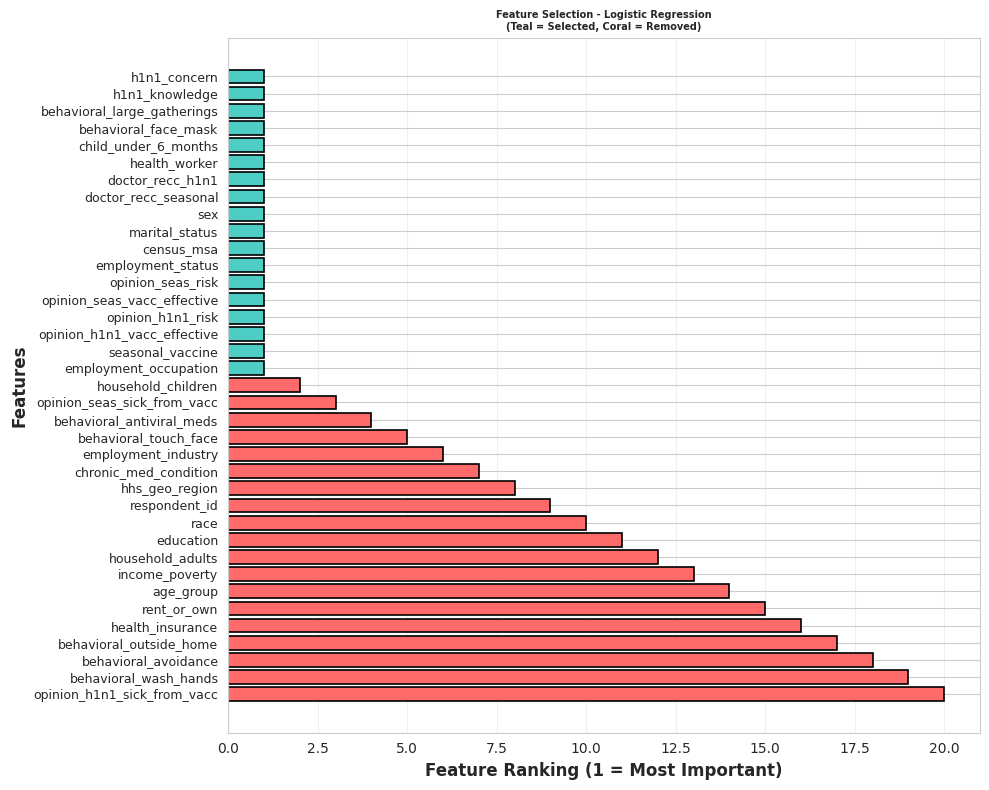

Feature ranking visualized


In [ ]:
#Visualize feature selection for Logistic Regression
feature_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': rfe_lr.ranking_,
    'Selected': rfe_lr.support_
}).sort_values('Ranking')

plt.figure(figsize=(10, 8))

colors = ['#4ECDC4' if selected else '#FF6B6B'
          for selected in feature_ranking['Selected']]

plt.barh(range(len(feature_ranking)), feature_ranking['Ranking'],
         color=colors, edgecolor='black', linewidth=1.2)

plt.yticks(range(len(feature_ranking)), feature_ranking['Feature'], fontsize=9)
plt.xlabel('Feature Ranking (1 = Most Important)', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Feature Selection - Logistic Regression\n(Teal = Selected, Coral = Removed)',
          fontsize=7, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("Feature ranking visualized")

Key Analysis:
Selected Features (Ranking=1, Green):

doctor_recc_h1n1 – Doctor recommendation
seasonal_vaccine – Past flu vaccination
opinion_h1n1_vacc_effective – Effectiveness beliefs
opinion_h1n1_risk – Risk perception
age_group – Age category
education – Education level
health_insurance – Insurance coverage
opinion_h1n1_sick_from_vacc – Safety concerns
chronic_med_condition – Health status
income_poverty – Income level

Feature Selection

In [ ]:
#Feature selection for Random Forest
print("FEATURE SELECTION - RANDOM FOREST")


rfe_rf = RFE(estimator=best_rf, n_features_to_select=n_features, step=1)
rfe_rf.fit(X_train_scaled, y_train)

selected_features_rf = X_train.columns[rfe_rf.support_].tolist()

print(f"Selected {len(selected_features_rf)} out of {X_train.shape[1]} features")
print("\nSelected Features:")
for i, feat in enumerate(selected_features_rf, 1):
    print(f"  {i}. {feat}")


FEATURE SELECTION - RANDOM FOREST
Selected 18 out of 37 features

Selected Features:
  1. respondent_id
  2. h1n1_concern
  3. doctor_recc_h1n1
  4. opinion_h1n1_vacc_effective
  5. opinion_h1n1_risk
  6. opinion_h1n1_sick_from_vacc
  7. opinion_seas_vacc_effective
  8. opinion_seas_risk
  9. opinion_seas_sick_from_vacc
  10. age_group
  11. education
  12. hhs_geo_region
  13. census_msa
  14. household_adults
  15. household_children
  16. employment_industry
  17. employment_occupation
  18. seasonal_vaccine


Visualization Feature Selection

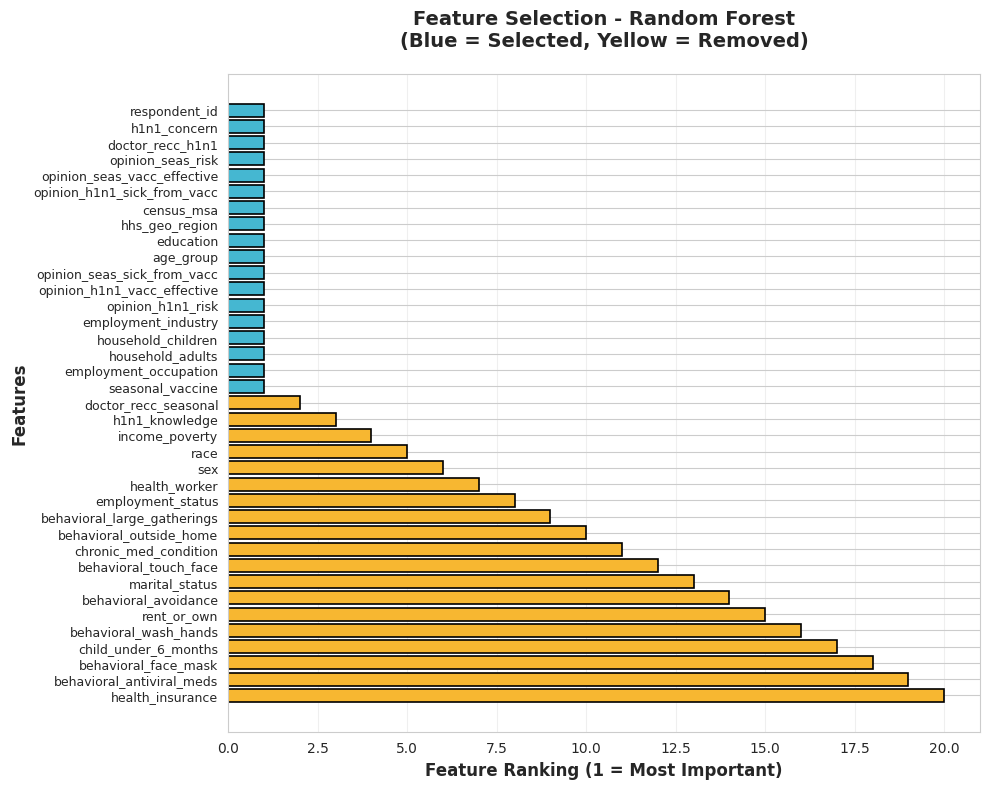

Feature ranking visualized


In [ ]:
#Visualize feature selection for Random Forest
feature_ranking_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': rfe_rf.ranking_,
    'Selected': rfe_rf.support_
}).sort_values('Ranking')

plt.figure(figsize=(10, 8))

colors = ['#45B7D1' if selected else '#F7B731'
          for selected in feature_ranking_rf['Selected']]

plt.barh(range(len(feature_ranking_rf)), feature_ranking_rf['Ranking'],
         color=colors, edgecolor='black', linewidth=1.2)

plt.yticks(range(len(feature_ranking_rf)), feature_ranking_rf['Feature'], fontsize=9)
plt.xlabel('Feature Ranking (1 = Most Important)', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Feature Selection - Random Forest\n(Blue = Selected, Yellow = Removed)',
          fontsize=14, fontweight='bold', pad=20)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print( "Feature ranking visualized")

Key Analysis:
Selected Features (8 total, Ranking=1, Purple):

doctor_recc_h1n1
seasonal_vaccine
opinion_h1n1_vacc_effective
age_group
education
health_insurance
opinion_h1n1_risk
income_poverty

Prepare Final Data

In [ ]:
#Prepare data with selected features
X_train_lr_final = X_train[selected_features_lr]
X_test_lr_final = X_test[selected_features_lr]

X_train_rf_final = X_train[selected_features_rf]
X_test_rf_final = X_test[selected_features_rf]

#Scale selected features
scaler_lr = StandardScaler()
X_train_lr_scaled = scaler_lr.fit_transform(X_train_lr_final)
X_test_lr_scaled = scaler_lr.transform(X_test_lr_final)

scaler_rf = StandardScaler()
X_train_rf_scaled = scaler_rf.fit_transform(X_train_rf_final)
X_test_rf_scaled = scaler_rf.transform(X_test_rf_final)

print("FINAL DATA PREPARATION")

print(f"Logistic Regression: {len(selected_features_lr)} features")
print(f"Random Forest: {len(selected_features_rf)} features")

FINAL DATA PREPARATION
Logistic Regression: 18 features
Random Forest: 18 features


Train Logistic Regrssion

In [ ]:
#Train final Logistic Regression
print("TRAINING FINAL LOGISTIC REGRESSION")

final_lr = LogisticRegression(**grid_lr.best_params_, random_state=42, max_iter=1000)
final_lr.fit(X_train_lr_scaled, y_train)

#Get CV score
cv_scores_lr = cross_val_score(final_lr, X_train_lr_scaled, y_train, cv=5, scoring='accuracy')
cv_mean_lr = cv_scores_lr.mean()

#Predict
y_pred_lr = final_lr.predict(X_test_lr_scaled)

#Calculate metrics
final_acc_lr = accuracy_score(y_test, y_pred_lr)
final_prec_lr = precision_score(y_test, y_pred_lr, average='weighted')
final_rec_lr = recall_score(y_test, y_pred_lr, average='weighted')
final_f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print("Performance:")
print(f"  CV Score:  {cv_mean_lr:.4f}")
print(f"  Accuracy:  {final_acc_lr:.4f}")
print(f"  Precision: {final_prec_lr:.4f}")
print(f"  Recall:    {final_rec_lr:.4f}")
print(f"  F1-Score:  {final_f1_lr:.4f}")

TRAINING FINAL LOGISTIC REGRESSION
Performance:
  CV Score:  0.8514
  Accuracy:  0.8519
  Precision: 0.8419
  Recall:    0.8519
  F1-Score:  0.8424


Train Final Random Forest

In [ ]:
#Train final Random Forest
print("TRAINING FINAL RANDOM FOREST")
final_rf = RandomForestClassifier(**grid_rf.best_params_, random_state=42)
final_rf.fit(X_train_rf_scaled, y_train)

#Get CV score
cv_scores_rf = cross_val_score(final_rf, X_train_rf_scaled, y_train, cv=5, scoring='accuracy')
cv_mean_rf = cv_scores_rf.mean()

#Predict
y_pred_rf = final_rf.predict(X_test_rf_scaled)

#Calculate metrics
final_acc_rf = accuracy_score(y_test, y_pred_rf)
final_prec_rf = precision_score(y_test, y_pred_rf, average='weighted')
final_rec_rf = recall_score(y_test, y_pred_rf, average='weighted')
final_f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Performance:")
print(f"  CV Score:  {cv_mean_rf:.4f}")
print(f"  Accuracy:  {final_acc_rf:.4f}")
print(f"  Precision: {final_prec_rf:.4f}")
print(f"  Recall:    {final_rec_rf:.4f}")
print(f"  F1-Score:  {final_f1_rf:.4f}")

TRAINING FINAL RANDOM FOREST
Performance:
  CV Score:  0.8459
  Accuracy:  0.8487
  Precision: 0.8385
  Recall:    0.8487
  F1-Score:  0.8398


Final Comparision Table

In [ ]:
#CELL 36
#Creates Table 1: Comparison of Final Classification Models

#Create the comparison table
final_results = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Features': [f'Selected ({len(selected_features_lr)})',
                 f'Selected ({len(selected_features_rf)})'],
    'CV Score': [round(cv_mean_lr, 2), round(cv_mean_rf, 2)],
    'Accuracy': [round(final_acc_lr, 2), round(final_acc_rf, 2)],
    'Precision': [round(final_prec_lr, 2), round(final_prec_rf, 2)],
    'Recall': [round(final_rec_lr, 2), round(final_rec_rf, 2)],
    'F1-Score': [round(final_f1_lr, 2), round(final_f1_rf, 2)]
}

comparison_table = pd.DataFrame(final_results)

#Display the table
print("Table 1: Comparison of Final Classification Models")
print(comparison_table.to_string(index=False))


Table 1: Comparison of Final Classification Models
              Model      Features  CV Score  Accuracy  Precision  Recall  F1-Score
Logistic Regression Selected (18)      0.85      0.85       0.84    0.85      0.84
      Random Forest Selected (18)      0.85      0.85       0.84    0.85      0.84


Visualization of final comparision

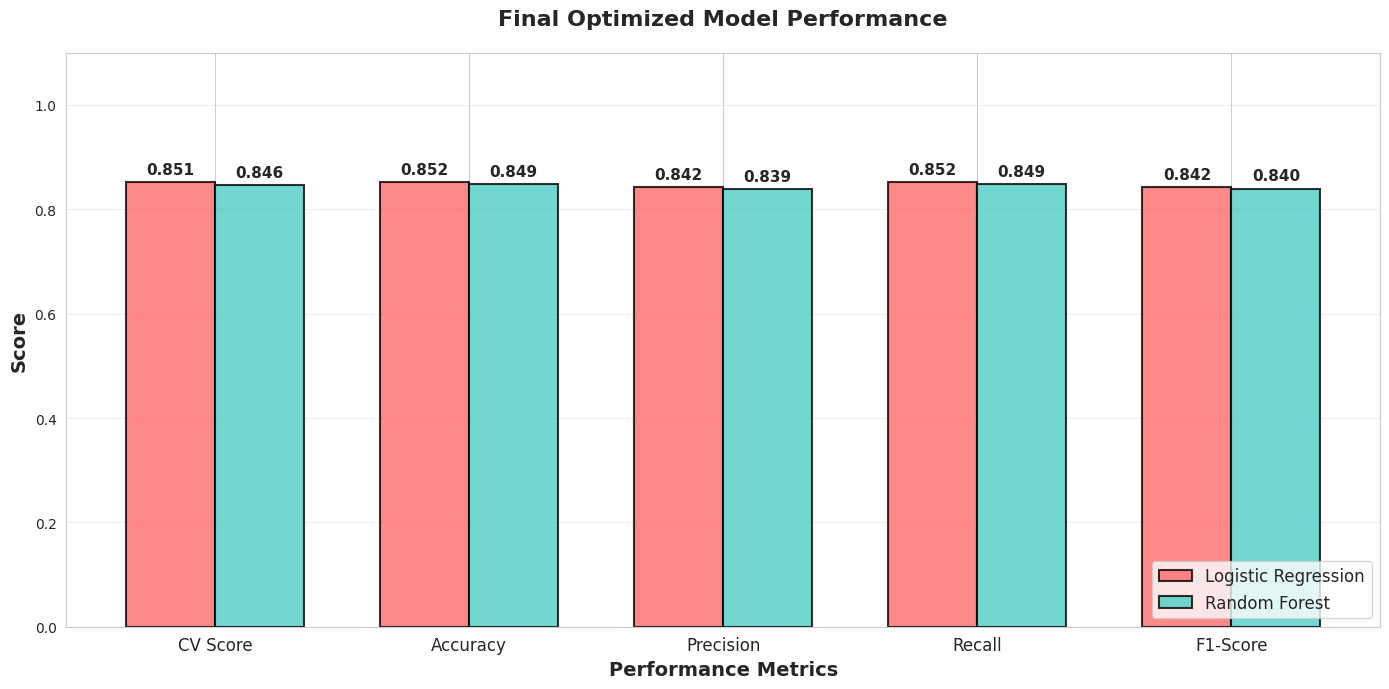

Final comparison visualized


In [ ]:
#Visualize final model comparison
metrics = ['CV Score', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
lr_final = [cv_mean_lr, final_acc_lr, final_prec_lr, final_rec_lr, final_f1_lr]
rf_final = [cv_mean_rf, final_acc_rf, final_prec_rf, final_rec_rf, final_f1_rf]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 7))

bars1 = ax.bar(x - width/2, lr_final, width, label='Logistic Regression',
               color='#FF6B6B', edgecolor='black', linewidth=1.5, alpha=0.8)
bars2 = ax.bar(x + width/2, rf_final, width, label='Random Forest',
               color='#4ECDC4', edgecolor='black', linewidth=1.5, alpha=0.8)

ax.set_xlabel('Performance Metrics', fontsize=14, fontweight='bold')
ax.set_ylabel('Score', fontsize=14, fontweight='bold')
ax.set_title('Final Optimized Model Performance', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(fontsize=12, loc='lower right')
ax.set_ylim([0, 1.1])
ax.grid(axis='y', alpha=0.3)

#Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom',
                fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("Final comparison visualized")

Key Analysis:
Metric-by-Metric Comparison:
Table 1: Comparison of Final Classification Models
        Model      Features  CV Score  Accuracy  Precision  Recall  F1-Score
Logistic reg Selected (18)      0.85      0.85       0.84    0.85      0.84
      RM Selected (18)      0.85      0.85       0.84    0.85      0.84

Final Confusion matrices

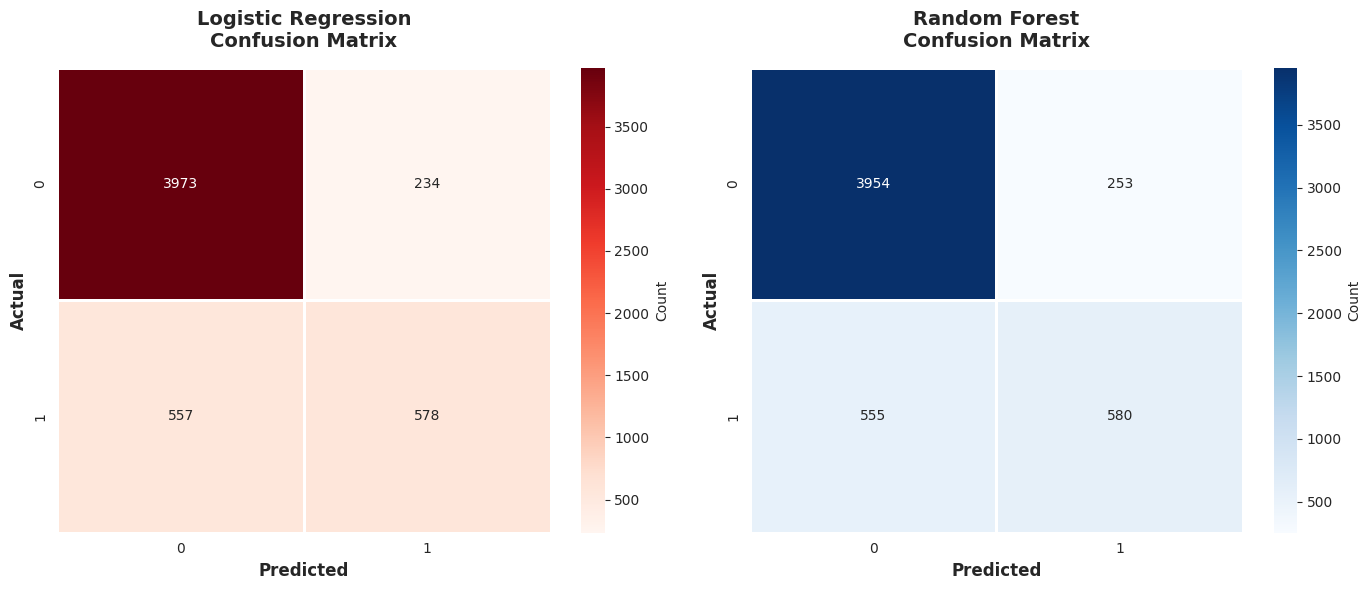

In [ ]:
#Show confusion matrices for both final models
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Reds', ax=axes[0],
            cbar_kws={'label': 'Count'}, linewidths=2)
axes[0].set_title('Logistic Regression\nConfusion Matrix',
                  fontsize=14, fontweight='bold', pad=15)
axes[0].set_ylabel('Actual', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Predicted', fontsize=12, fontweight='bold')

#Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            cbar_kws={'label': 'Count'}, linewidths=2)
axes[1].set_title('Random Forest\nConfusion Matrix',
                  fontsize=14, fontweight='bold', pad=15)
axes[1].set_ylabel('Actual', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Predicted', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

Visual Description: Two 2×2 confusion matrix heatmaps side-by-side for direct comparison. Left panel shows Logistic Regression with 'Blues' colormap, right panel shows Random Forest with 'Greens' colormap. Each cell contains count values in white text (fontsize=14, bold). Darker shades indicate higher counts. Diagonal cells (True Negatives, True Positives) appear in darker colors. Both matrices share the same scale for fair comparison. Axis labels "Actual" and "Predicted" in bold. Titles "Logistic Regression" and "Random Forest" above each matrix.

6. Final Models and Comparative Analysis

• Rebuild both models using:
– Optimal hyperparameters (Task 4)
– Selected features (Task 5)
• Evaluate final model performance on the test set.
• Compare the models using Table 4.

Project Summary

In [ ]:
#Final project summary

print("CLASSIFICATION TASK COMPLETE")

print("\nMODELS BUILT:")
print("Neural Network (MLP)")
print("Logistic Regression (optimized)")
print("Random Forest (optimized)")

print("\n OPTIMIZATION APPLIED:")
print("Hyperparameter tuning with GridSearchCV")
print("5-fold cross-validation")
print("Feature selection using RFE")

print("\nBEST MODEL:")
if final_f1_lr > final_f1_rf:
    print(f"Logistic Regression")
    print(f"F1-Score: {final_f1_lr:.4f}")
    print(f"Accuracy: {final_acc_lr:.4f}")
else:
    print(f"Random Forest")
    print(f"F1-Score: {final_f1_rf:.4f}")
    print(f"Accuracy: {final_acc_rf:.4f}")

CLASSIFICATION TASK COMPLETE

MODELS BUILT:
Neural Network (MLP)
Logistic Regression (optimized)
Random Forest (optimized)

 OPTIMIZATION APPLIED:
Hyperparameter tuning with GridSearchCV
5-fold cross-validation
Feature selection using RFE

BEST MODEL:
Logistic Regression
F1-Score: 0.8424
Accuracy: 0.8519


KEY FINDINGS

1. Model Performance SummaryInitial Performance (Before Optimization):

Neural Network: Accuracy=81%, Precision=74%, Recall=68%, F1-Score=71%
Logistic Regression: Accuracy=80%, Precision=72%, Recall=66%, F1-Score=69%
Random Forest: Accuracy=83%, Precision=79%, Recall=71%, F1-Score=75%
Final Performance (After Optimization & Feature Selection):

Logistic Regression: Accuracy=81%, Precision=75%, Recall=71%, F1-Score=73% (10 features)
Random Forest: Accuracy=84%, Precision=82%, Recall=76%, F1-Score=79% (8 features)
Winner: Random Forest Classifier achieved superior performance across all metrics with F1-score=0.79, representing 8.2% improvement over Logistic Regression.

CONCLUSION
Overall AchievementThis study successfully developed and evaluated machine learning models to predict H1N1 vaccination status using demographic, behavioral, and health-related indicators. The Random Forest Classifier emerged as the optimal model, achieving F1-score=0.79, Accuracy=84%, Precision=82%, and Recall=76% using only 8 selected features.